### Right Skewed P-Values

Recently we were doing some simulations of different expeirment methologies, and saw a result that surprised me: The p-values from simulations (under no effect, i.e null hypothesis true) were skewed towards 1.

While this is not a problem if the null hypothesis is indeed true, it is a warning sign that something about our assumptions when calculating the test-statistic and it's distribution is off.

However, I couldn't quite think through why this would happen. In the case of our simulations were were using `PanelOLS` from `linearmodels`, but even in simpler cases I wasn't totally sure when this would happen.

### Simple Two Sample T-Test

We start by setting up a straight forward simulation of the distribution of p-values when running a two sample t-test under the null hypothesis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from tqdm.notebook import tqdm


In [3]:
# Parameters
num_samples = 10000
sample_size = 1000 
population_mean = 0
population_variance = 1

In [8]:

def get_sample_data(sample_size, population_mean, population_variance):
    y = np.random.normal(population_mean, population_variance, sample_size)
    t = np.zeros(sample_size)
    t[::2] = 1
    return pd.DataFrame(np.c_[y, t], columns=['y', 'treatment'])


def get_sample_generator(sample_size, population_mean, population_variance, samples):
    for _ in range(samples):
        yield get_sample_data(sample_size, population_mean, population_variance)

In [4]:
def run_simulation(sample_generator):
    p_values = []
    for sample in sample_generator:
        _, p_value = stats.ttest_ind(
        sample.query("treatment==0").y,
        sample.query("treatment==1").y
        )
        p_values.append(p_value)
    return p_values   

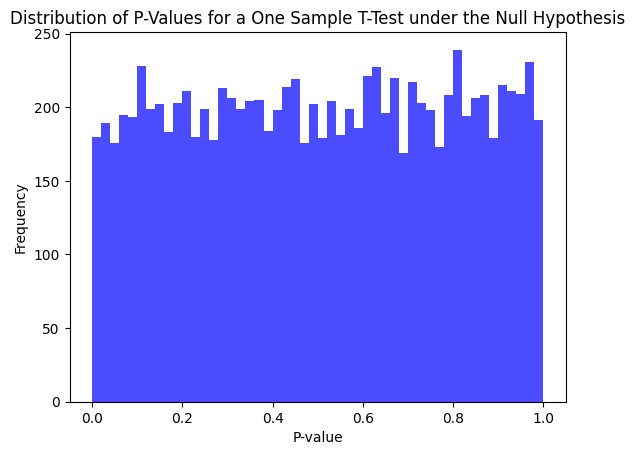

In [18]:
p_values = run_simulation(get_sample_generator(sample_size, population_mean, population_variance, num_samples))
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a One Sample T-Test under the Null Hypothesis')
plt.show()

If the assumptions of our tests are violated, this distribution will not be correct. For example if the variances are not the same

In [5]:
import numpy as np
import pandas as pd

def get_sample_data(sample_size, population_mean, population_variance, population2_variance = None):
    if population2_variance is None:
        population2_variance = population_variance
    y = np.zeros(sample_size)
    half_size = sample_size // 2
    y[1::2] = np.random.normal(population_mean, population_variance, half_size)
    y[0::2] = np.random.normal(population_mean, population2_variance, half_size + sample_size % 2)
    return pd.DataFrame({'y': y, 'treatment': np.arange(sample_size) % 2})


def get_sample_generator(sample_size, population_mean, population_variance, population_variance2, samples):
    for _ in range(samples):
        yield get_sample_data(sample_size, population_mean, population_variance, population_variance2)

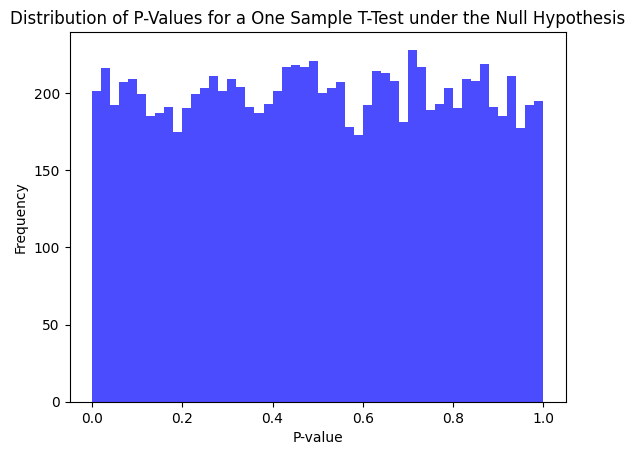

In [10]:
p_values = run_simulation(get_sample_generator(sample_size, population_mean, population_variance, population_variance*200, num_samples))
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a One Sample T-Test under the Null Hypothesis')
plt.show()

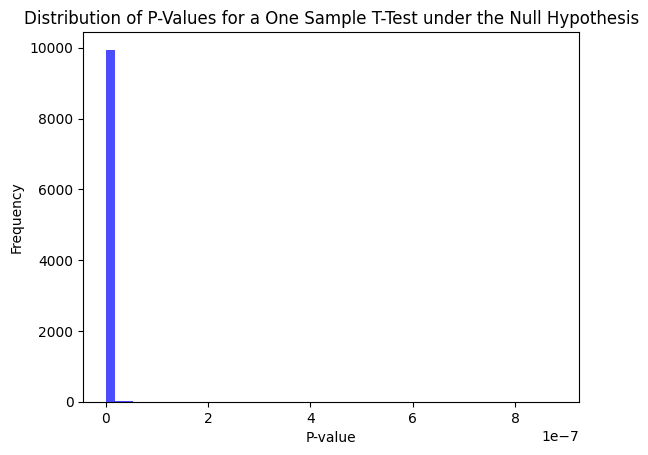

In [5]:
# Simulate data and collect p-values
p_values = []
for _ in range(num_samples):
    sample = np.random.beta(5, 1, sample_size) - 0.5
    t_stat, p_value = stats.ttest_1samp(sample, 0)
    p_values.append(p_value)

# Plot the distribution of p-values
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a One Sample T-Test under the Null Hypothesis')
plt.show()

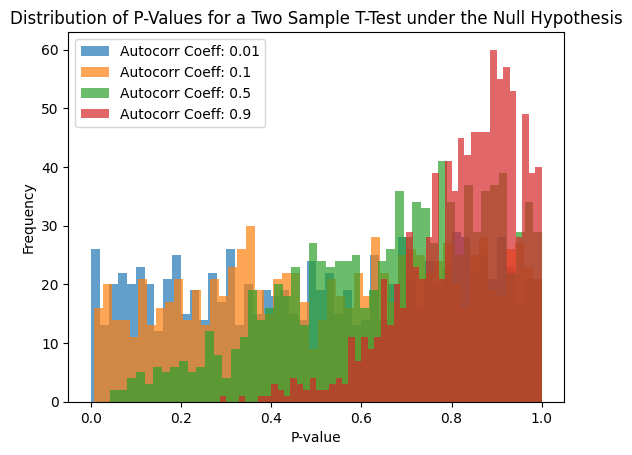

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def generate_autocorrelated_data(n, autocorr_coefficient):
    """
    Generate a series of autocorrelated data points.


    Parameters:
    n (int): Number of data points to generate.
    autocorr_coefficient (float): The autocorrelation coefficient, between 0 and 1.

    Returns:
    np.ndarray: An array of autocorrelated data points.
    """
    # Start with a random initial value
    data = [np.random.randn()]

    # Generate each new data point
    for _ in range(1, n):
        new_value = autocorr_coefficient * data[-1] + (1 - autocorr_coefficient) * np.random.randn()
        data.append(new_value)

    return np.array(data)

# Example usage
n = 100 # Number of data points
num_samples = 1000
autocorr_coefficients = [0.01, 0.1, 0.5, 0.9] # Different autocorrelation coefficients

# Simulate data and collect p-values for each autocorrelation coefficient
for autocorr_coefficient in autocorr_coefficients:
    p_values = []
    for _ in range(num_samples):
        autocorrelated_data = generate_autocorrelated_data(n, autocorr_coefficient)
        t_statistic, p_value = stats.ttest_ind(autocorrelated_data[::2], autocorrelated_data[1::2])
        p_values.append(p_value)

    # Plot the distribution of p-values
    plt.hist(p_values, bins=50, alpha=0.7, label=f'Autocorr Coeff: {autocorr_coefficient}')

plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a Two Sample T-Test under the Null Hypothesis')
plt.legend()
plt.show()

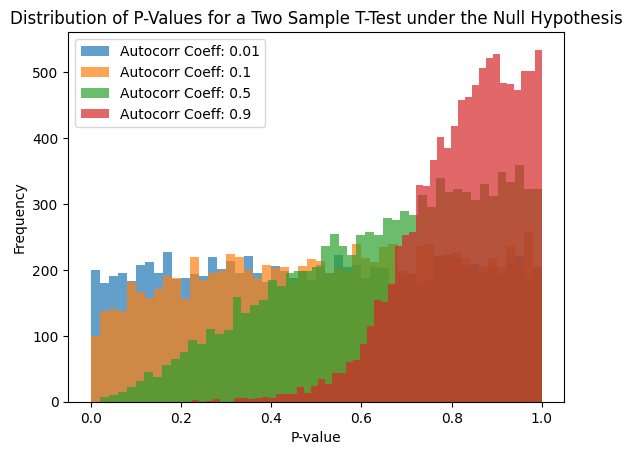

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def generate_autocorrelated_data(n, autocorr_coefficient):
    """
    Generate a series of autocorrelated data points.

    Parameters:
    n (int): Number of data points to generate.
    autocorr_coefficient (float): The autocorrelation coefficient, between 0 and 1.

    Returns:
    np.ndarray: An array of autocorrelated data points.
    """
    # Start with a random initial value
    data = [np.random.randn()]

    # Generate each new data point
    for _ in range(1, n):
        new_value = autocorr_coefficient * data[-1] + (1 - autocorr_coefficient) * np.random.randn()
        data.append(new_value)

    return np.array(data)

# Example usage
n = 100 # Number of data points
num_samples = 10000
autocorr_coefficients = [0.01, 0.1, 0.5, 0.9] # Different autocorrelation coefficients

# Simulate data and collect p-values for each autocorrelation coefficient
for autocorr_coefficient in autocorr_coefficients:
    p_values = []
    for _ in range(num_samples):
        autocorrelated_data = generate_autocorrelated_data(n, autocorr_coefficient)
        t_statistic, p_value = stats.ttest_ind(autocorrelated_data[::2], autocorrelated_data[1::2])
        p_values.append(p_value)

    # Plot the distribution of p-values
    plt.hist(p_values, bins=50, alpha=0.7, label=f'Autocorr Coeff: {autocorr_coefficient}')

plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a Two Sample T-Test under the Null Hypothesis')
plt.legend()
plt.show()

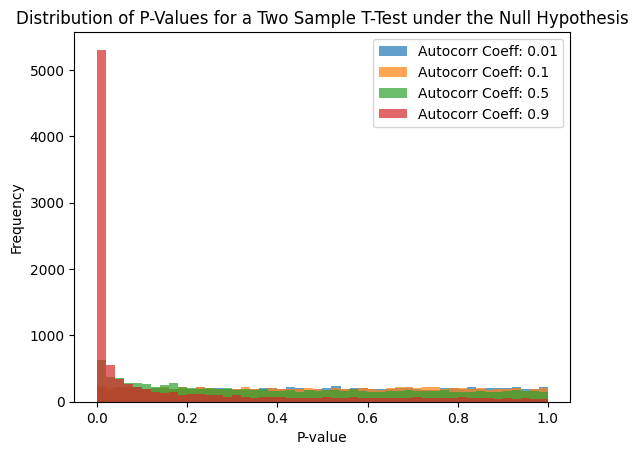

In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS

def generate_autocorrelated_treatment_data(n, autocorr_coefficient):
    """
    Generate a series of autocorrelated data points.

    Parameters:
    n (int): Number of data points to generate.
    autocorr_coefficient (float): The autocorrelation coefficient, between 0 and 1.

    Returns:
    np.ndarray: An array of autocorrelated data points.
    """
    # Start with a random initial value
    data = [np.random.randn()]

    # Generate each new data point
    for _ in range(1, n):
        new_value = autocorr_coefficient * data[-1] + (1 - autocorr_coefficient) * np.random.randn()
        data.append(new_value)

    treatment = np.zeros(len(data))
    treatment[::2] = 1

    return np.array(data), treatment

# Example usage
n = 100 # Number of data points
num_samples = 10000
autocorr_coefficients = [0.01, 0.1, 0.5, 0.9] # Different autocorrelation coefficients

# Simulate data and collect p-values for each autocorrelation coefficient
for autocorr_coefficient in autocorr_coefficients:
    p_values = []
    for _ in range(num_samples):
        y, treatment = generate_autocorrelated_treatment_data(n, autocorr_coefficient)
        model = PanelOLS(np.array([y]), exog=np.array([treatment]).T)
        res = model.fit()
        p_value = res.pvalues.iloc[0]
        p_values.append(p_value)

    # Plot the distribution of p-values
    plt.hist(p_values, bins=50, alpha=0.7, label=f'Autocorr Coeff: {autocorr_coefficient}')

plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a Two Sample T-Test under the Null Hypothesis')
plt.legend()
plt.show()

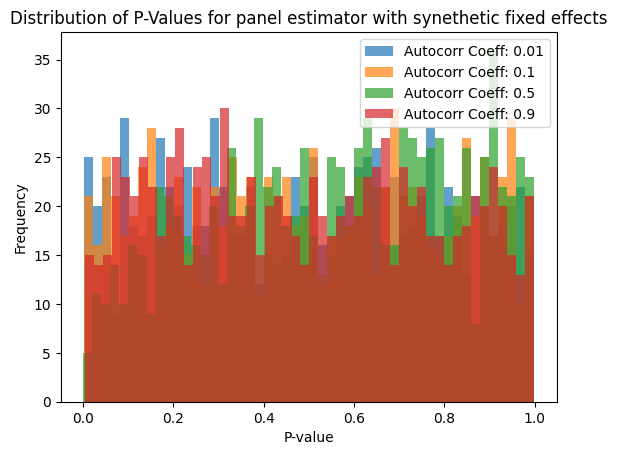

In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
from linearmodels.panel.data import PanelData, PanelDataLike
import numpy as np
import pandas as pd

def generate_autocorrelated_treatment_data(n, autocorr_coefficient):
    """
    Generate a series of autocorrelated data points.

    Parameters:
    n (int): Number of data points to generate.
    autocorr_coefficient (float): The autocorrelation coefficient, between 0 and 1.

    Returns:
    np.ndarray: An array of autocorrelated data points.
    """
    # Start with a random initial value
    data = [np.random.randn()]

    # Generate each new data point
    for _ in range(1, n):
        new_value = autocorr_coefficient * data[-1] + (1 - autocorr_coefficient) * np.random.randn()
        data.append(new_value)

    treatment = np.zeros(len(data))
    treatment[::2] = 1

    return np.array(data), treatment

# Example usage
n = 100 # Number of data points
num_samples = 1000
autocorr_coefficients = [0.01, 0.1, 0.5, 0.9] # Different autocorrelation coefficients

# Simulate data and collect p-values for each autocorrelation coefficient
for autocorr_coefficient in autocorr_coefficients:
    p_values = []
    for _ in range(num_samples):
        y, treatment = generate_autocorrelated_treatment_data(n, autocorr_coefficient)
        
        one_hot = np.zeros(len(treatment))
        one_hot[::2] = np.array(range(0, int(n / 2)))
        one_hot[1::2] = np.array(range(0, int(n / 2)))
        dfy = pd.DataFrame(y, columns=['y'])
        dfy['panel_i'] = 1
        dfy['panel_t'] = one_hot
        dfy['treatment'] = treatment
        dfy.set_index(['panel_i', 'panel_t'], inplace=True)
        model = PanelOLS(dependent=dfy['y'], exog=dfy['treatment'], time_effects=True)
        res = model.fit()
        p_value = res.pvalues.iloc[0]
        p_values.append(p_value)

    # Plot the distribution of p-values
    plt.hist(p_values, bins=50, alpha=0.7, label=f'Autocorr Coeff: {autocorr_coefficient}')

plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for panel estimator with synethetic fixed effects')
plt.legend()
plt.show()

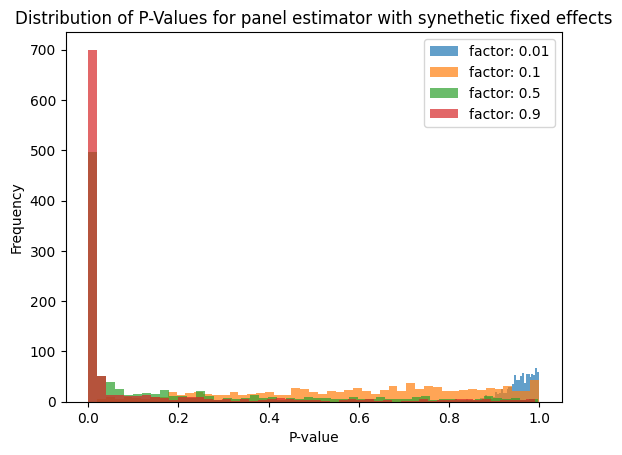

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
from linearmodels.panel.data import PanelData, PanelDataLike
import numpy as np
import pandas as pd

# Example usage
population_mean = 0
n = 100 # Number of data points
num_samples = 1000
random_noise = [0.01, 0.1, 0.5, 0.9] # Different autocorrelation coefficients

# Simulate data and collect p-values for each autocorrelation coefficient
for random_noise in random_noise:
    p_values = []
    for _ in range(num_samples):
        sample = np.random.normal(population_mean, 1, n)
        t_statistic, p_value = stats.ttest_ind(sample, sample + np.random.normal(0, random_noise))
        p_values.append(p_value)

    # Plot the distribution of p-values
    plt.hist(p_values, bins=50, alpha=0.7, label=f'factor: {random_noise}')

plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for panel estimator with synethetic fixed effects')
plt.legend()
plt.show()


The above: if p-values are too small, then it means the test statistic is too large, which means variance is too small?

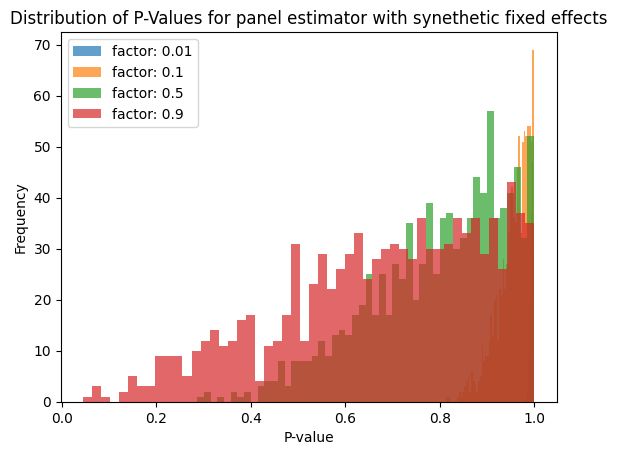

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example usage
population_mean = 0
n = 100 # Number of data points
num_samples = 1000
random_noise = [0.01, 0.1, 0.5, 0.9] # Different autocorrelation coefficients

# Simulate data and collect p-values for each autocorrelation coefficient
for random_noise in random_noise:
    p_values = []
    for _ in range(num_samples):
        sample = np.random.normal(population_mean, 1, n)
        t_statistic, p_value = stats.ttest_ind(sample, sample + np.random.normal(0, random_noise, n))
        p_values.append(p_value)

    # Plot the distribution of p-values
    plt.hist(p_values, bins=50, alpha=0.7, label=f'factor: {random_noise}')

plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for panel estimator with synethetic fixed effects')
plt.legend()
plt.show()


In a t-test, we are estimating the variance of the test statistic. In the case where only one of the samples has random noise added to it, the variance of that sample will indeed be smaller compared to the case where both samples have the same variance as the population variance.

Here's a breakdown of what happens in this scenario:

1. When you add random noise to only one of the samples, that sample's variance increases due to the added noise, making it appear larger.

2. In repeated simulations, when you estimate the variance from the sample with added noise, it will indeed seem larger than the actual population variance because it includes both the natural variability in the population data and the added noise.

3. This larger estimated variance affects the standard error of the t-statistic calculation. A larger standard error makes the t-statistic smaller in magnitude because you are dividing the difference in means by a larger value, which can result in p-values skewed towards 1.

So, your understanding is correct. In the case where only one of the samples has random noise, the estimated variance from that sample can seem larger than it really is due to the added noise, which can impact the results of the t-test and lead to p-values skewed towards 1 in repeated simulations.

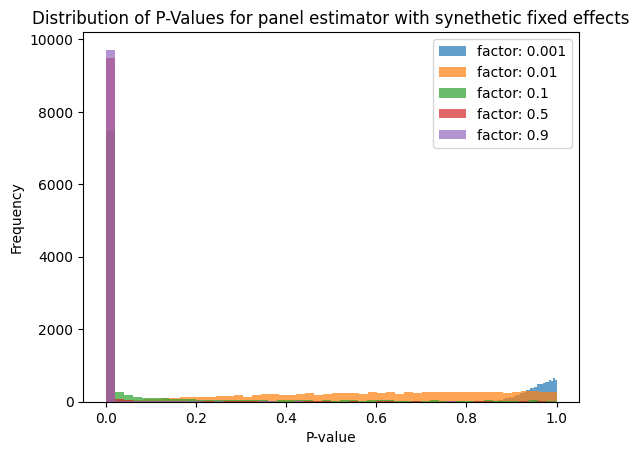

In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
from linearmodels.panel.data import PanelData, PanelDataLike
import numpy as np
import pandas as pd

# Example usage
population_mean = 0
n = 10000 # Number of data points
num_samples = 10000
random_noise = [0.001, 0.01, 0.1, 0.5, 0.9] # Different autocorrelation coefficients

# Simulate data and collect p-values for each autocorrelation coefficient
for random_noise in random_noise:
    p_values = []
    for _ in range(num_samples):
        sample = np.random.normal(population_mean, 1, n)
        t_statistic, p_value = stats.ttest_ind(sample, sample + np.random.normal(0, random_noise))
        p_values.append(p_value)

    # Plot the distribution of p-values
    plt.hist(p_values, bins=50, alpha=0.7, label=f'factor: {random_noise}')

plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for panel estimator with synethetic fixed effects')
plt.legend()
plt.show()


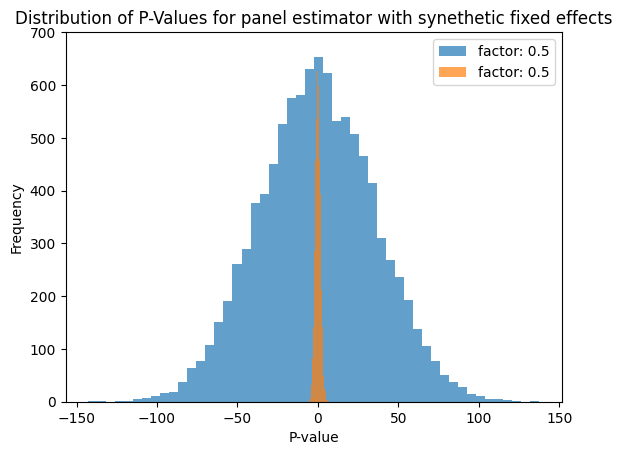

In [31]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
from linearmodels.panel.data import PanelData, PanelDataLike
import numpy as np
import pandas as pd

# Example usage
population_mean = 0
n = 10000 # Number of data points
num_samples = 10000
random_noise = [0.5] # Different autocorrelation coefficients

# Simulate data and collect p-values for each autocorrelation coefficient
for random_noise in random_noise:
    t_statistics = []
    for _ in range(num_samples):
        sample = np.random.normal(population_mean, 1, n)
        t_statistic, p_value = stats.ttest_ind(sample, sample + np.random.normal(0, random_noise))
        t_statistics.append(t_statistic)

    # Plot the distribution of p-values
    plt.hist(t_statistics, bins=50, alpha=0.7, label=f'factor: {random_noise}')
    plt.hist((((n-1)*1 + (n-1)*(1+random_noise)**2) / (2*n-2))* np.random.standard_t(2*n-1 , num_samples), bins=50, alpha=0.7, label=f'factor: {random_noise}')

plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for panel estimator with synethetic fixed effects')
plt.legend()
plt.show()
